# Import Libraries

In [1]:
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.12.0'

# Classify Images as either Horse or Human

## Load Dataset

In [3]:
# Training Data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-06-21 14:06:28--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   179MB/s    in 0.8s    

2023-06-21 14:06:29 (179 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [4]:
# Validation Data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-06-21 14:06:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-06-21 14:06:53 (88.9 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



### Unzip the Data

In [5]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

### Directory Config

In [6]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse31-3.png', 'horse45-6.png', 'horse08-0.png', 'horse03-3.png', 'horse05-3.png', 'horse46-6.png', 'horse07-4.png', 'horse24-6.png', 'horse19-8.png', 'horse35-5.png']
TRAIN SET HUMANS: ['human09-10.png', 'human12-00.png', 'human08-01.png', 'human15-27.png', 'human16-28.png', 'human03-18.png', 'human13-15.png', 'human12-04.png', 'human01-06.png', 'human17-02.png']
VAL SET HORSES: ['horse3-255.png', 'horse3-397.png', 'horse1-170.png', 'horse4-389.png', 'horse4-556.png', 'horse1-539.png', 'horse5-519.png', 'horse4-159.png', 'horse5-342.png', 'horse3-026.png']
VAL SET HUMANS: ['valhuman01-03.png', 'valhuman05-04.png', 'valhuman04-05.png', 'valhuman03-21.png', 'valhuman02-12.png', 'valhuman04-03.png', 'valhuman01-10.png', 'valhuman05-13.png', 'valhuman03-09.png', 'valhuman04-24.png']


In [8]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [9]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

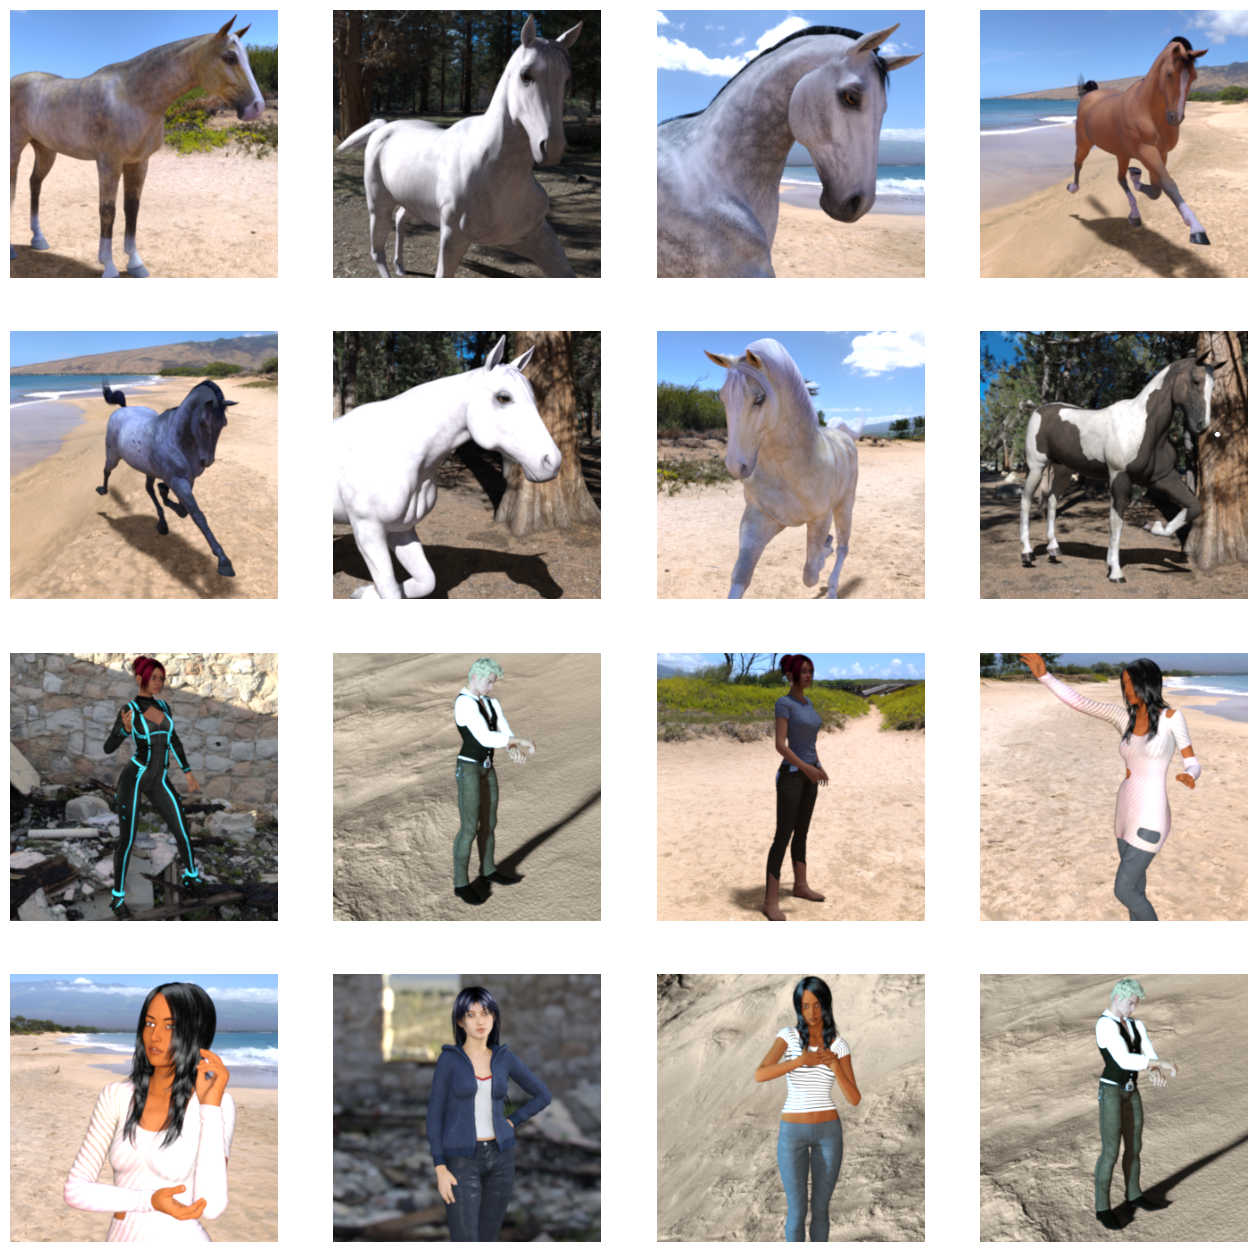

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Preprocess Data

In [15]:
train_data_path = './horse-or-human/'
valid_data_path = './validation-horse-or-human/'

train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Baseline CNN Model

In [12]:
model = keras.models.Sequential([

    # Layer 1 - Conv & MaxPool
    keras.layers.Conv2D(16, (3, 3), activation=keras.activations.relu, input_shape=(300, 300, 3)),
    keras.layers.MaxPool2D(2, 2),
    # Layer 2 - Conv & MaxPool
    keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, 2),
    # Layer 3 - Conv & MaxPool
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, 2),
    # Layer 4 - Conv & MaxPool
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, 2),
    # Layer 5 - Conv & MaxPool
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, 2),

    # Flatten Layer
    keras.layers.Flatten(),
    # Hidden Dense Layer
    keras.layers.Dense(512, activation=keras.activations.relu),
    # Output Layer
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

### Train Model

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 25s 1s/step - loss: 0.7367 - accuracy: 0.4939 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.7029 - accuracy: 0.5951 - val_loss: 0.6210 - val_accuracy: 0.7031
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6006 - accuracy: 0.7075 - val_loss: 0.2821 - val_accuracy: 0.9141
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5285 - accuracy: 0.8184 - val_loss: 0.3228 - val_accuracy: 0.8984
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.4105 - accuracy: 0.8776 - val_loss: 0.3137 - val_accuracy: 0.8984
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.3123 - accuracy: 0.8843 - val_loss: 0.8845 - val_accuracy: 0.8203
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.2475 - accuracy: 0.9055 - val_loss: 0.6598 - val_accuracy: 0.8594
Epoch 8/15
8/8 [========================

## Prediction

In [18]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving white-horse-g5fc6e84d4_640.jpg to white-horse-g5fc6e84d4_640.jpg
1/1 [==============================] - 0s 302ms/step
[0.8206789]
white-horse-g5fc6e84d4_640.jpg is a human


# Viz Intermediate Representations

1/1 [==============================] - 0s 98ms/step


<ipython-input-19-4fe1001d1582>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


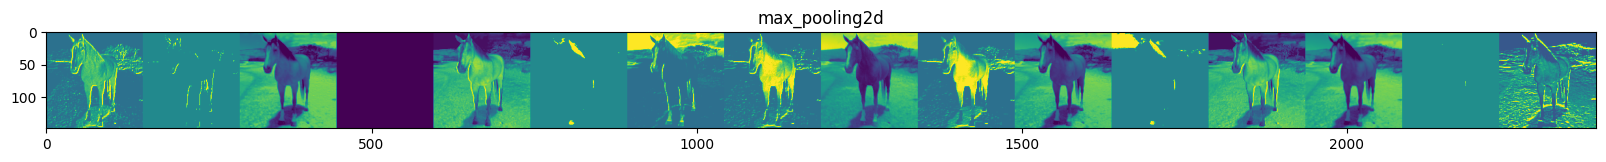

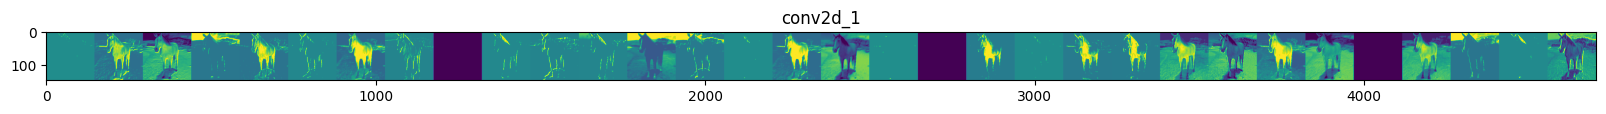

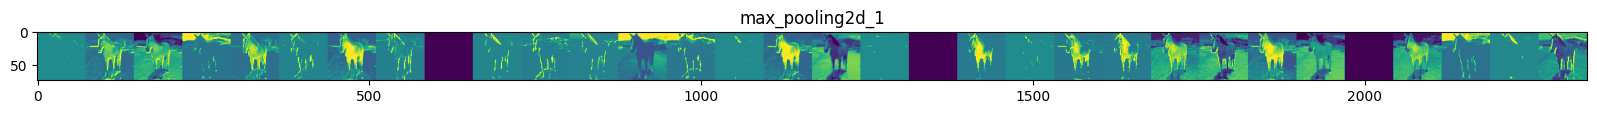

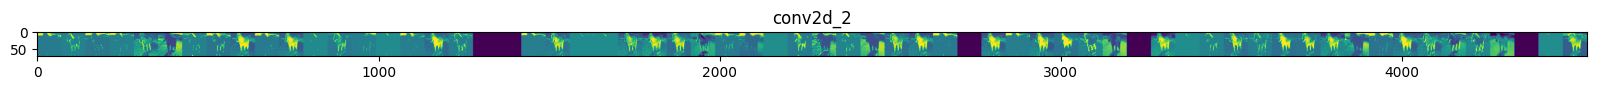

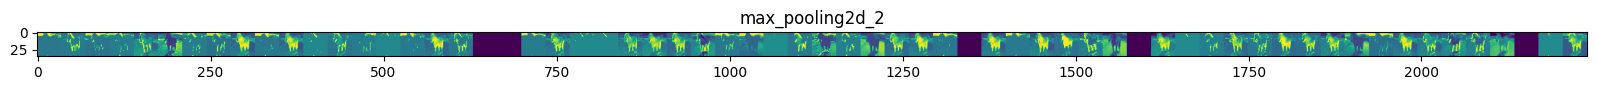

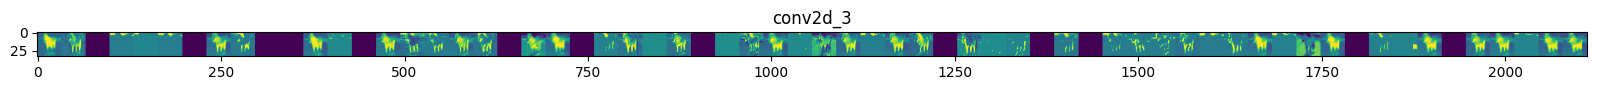

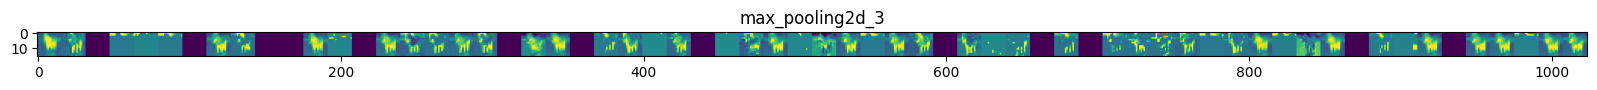

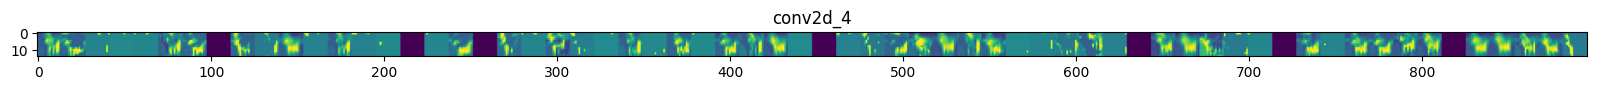

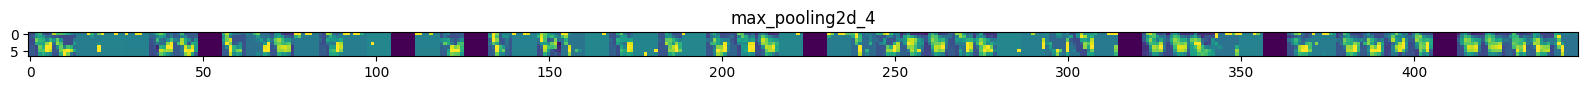

In [19]:
import random

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')